### Introduction to the problem

Objective:
To categorise the countries using socio-economic and health factors that determine the overall development of the country.

About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

Problem Statement:
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [77]:

#from IPython.display import HTML

#HTML('''<script>
#code_show=true; 
#function code_toggle() {
#if (code_show){
#$('div.input').hide();
#} else {
#$('div.input').show();
#}
#code_show = !code_show
#} 
#$( document ).ready(code_toggle);
#</script>
#<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

 ### Data Analysis of our dataset

In [79]:
country=pd.read_csv('Country-data.csv')
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [80]:
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

The dataset is very clean, no missing values

 #### Correlation matrix of our dataset

In [81]:
# Build correlation matrix
country_corr = country.corr()
country_corr.style.background_gradient(cmap='PuBu')

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


gdpp and income, life_expectancy and exports are positively correlated   

child_mort and total_fert are highly positive correlated

also, life_expec and child_mort are highly negative correlated

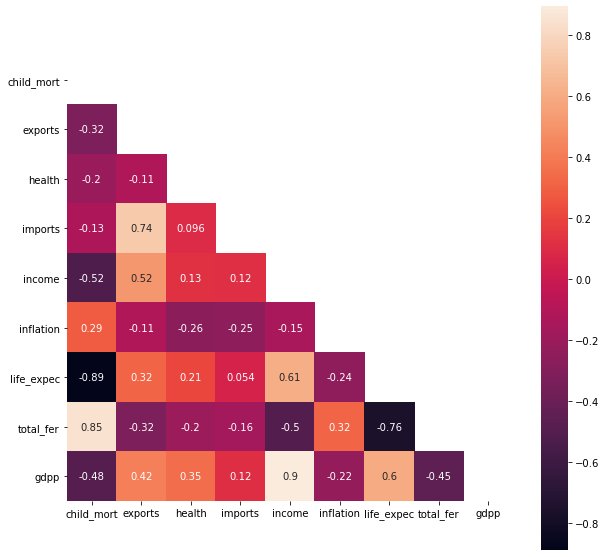

In [82]:
# Plotting heatmap

c_corr = country.corr()
f, ax = plt.subplots(figsize=(10, 10))
mask = np.triu(np.ones_like(c_corr, dtype=bool)) # removing the other side of the heatmap
#cmap = sns.diverging_palette(230, 20, as_cmap=True) #preparing cmap, but not necessary
sns.heatmap(c_corr,mask=mask,square=True,annot=True)#cmap=cmap & linewidths=.5 are not necessary
plt.show()

### Preprocessing the numerical variables

In [83]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [84]:
# in order to standardised the data:
from sklearn.preprocessing import StandardScaler

country_df=country.drop(columns=['country'])
country_df1=StandardScaler().fit_transform(country_df)
country_df2=pd.DataFrame(country_df1, columns=country_df.columns)
country_df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [85]:
# to append the country column to the standardised dataframe:

#country_df2['country'] = country['country'].values
#country_df2.head()

In [86]:
#country_df2.drop(['country'], axis=1, inplace=True)

In [89]:
country_df3=country_df2.copy()
country_df4=country_df2.copy()

In [91]:
country_df3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### KMeans Clustering

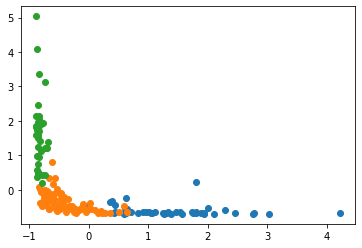

In [92]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=3, random_state=123)
km1 = km.fit(country_df2)
km2 = km1.predict(country_df2)

country_df2['cluster']=km2
 
#country_df2.head()
# we can plot  2 dimensional clustering using different variables.
clusterval = country_df2['cluster'].unique()
for cluster in clusterval:
    plt.scatter(country_df2[country_df2['cluster']==cluster]['child_mort'], country_df2[country_df2['cluster']==cluster]['gdpp'])
plt.show()

In [93]:
from sklearn.metrics import silhouette_score

silhouette_score(country_df2, km2)

0.33962718585493273

 Categorising the countries using socio-economic and health factors to determine the overall development of the country

In [94]:
# Cluster of our countries

country_df2['cluster'].value_counts()

0    84
1    47
2    36
Name: cluster, dtype: int64

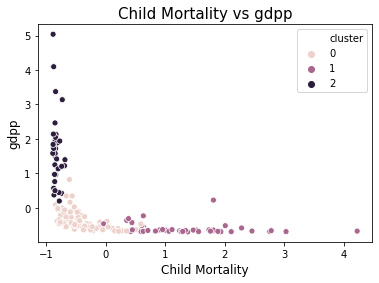

In [95]:
# to plot the clusters:
import seaborn as sns
sns.scatterplot(country_df2['child_mort'],country_df2['gdpp'],hue='cluster',data=country_df2) 
plt.title("Child Mortality vs gdpp", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()


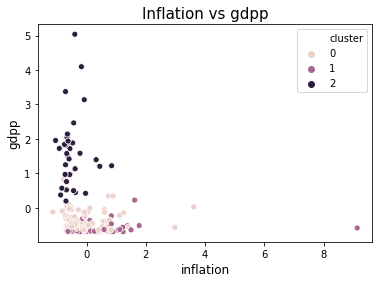

In [96]:
sns.scatterplot(country_df2['inflation'],country_df2['gdpp'],hue='cluster',data=country_df2) 
plt.title("Inflation vs gdpp", fontsize=15)
plt.xlabel("inflation", fontsize=12)
plt.ylabel("gdpp", fontsize=12)
plt.show()

based on the above visulazation , we conclude that countries with low inflation, low child mortality, and high gdpp are the developed countries.

Therefore Cluster 0 = developing Countries,

Cluster 1 = less developed countries, 

and Cluster 2 = Developed countries.

In [97]:
country_df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0


### Exploratory Data Analysis¶

##### Visualizing Distribution

Plotting a pairplot

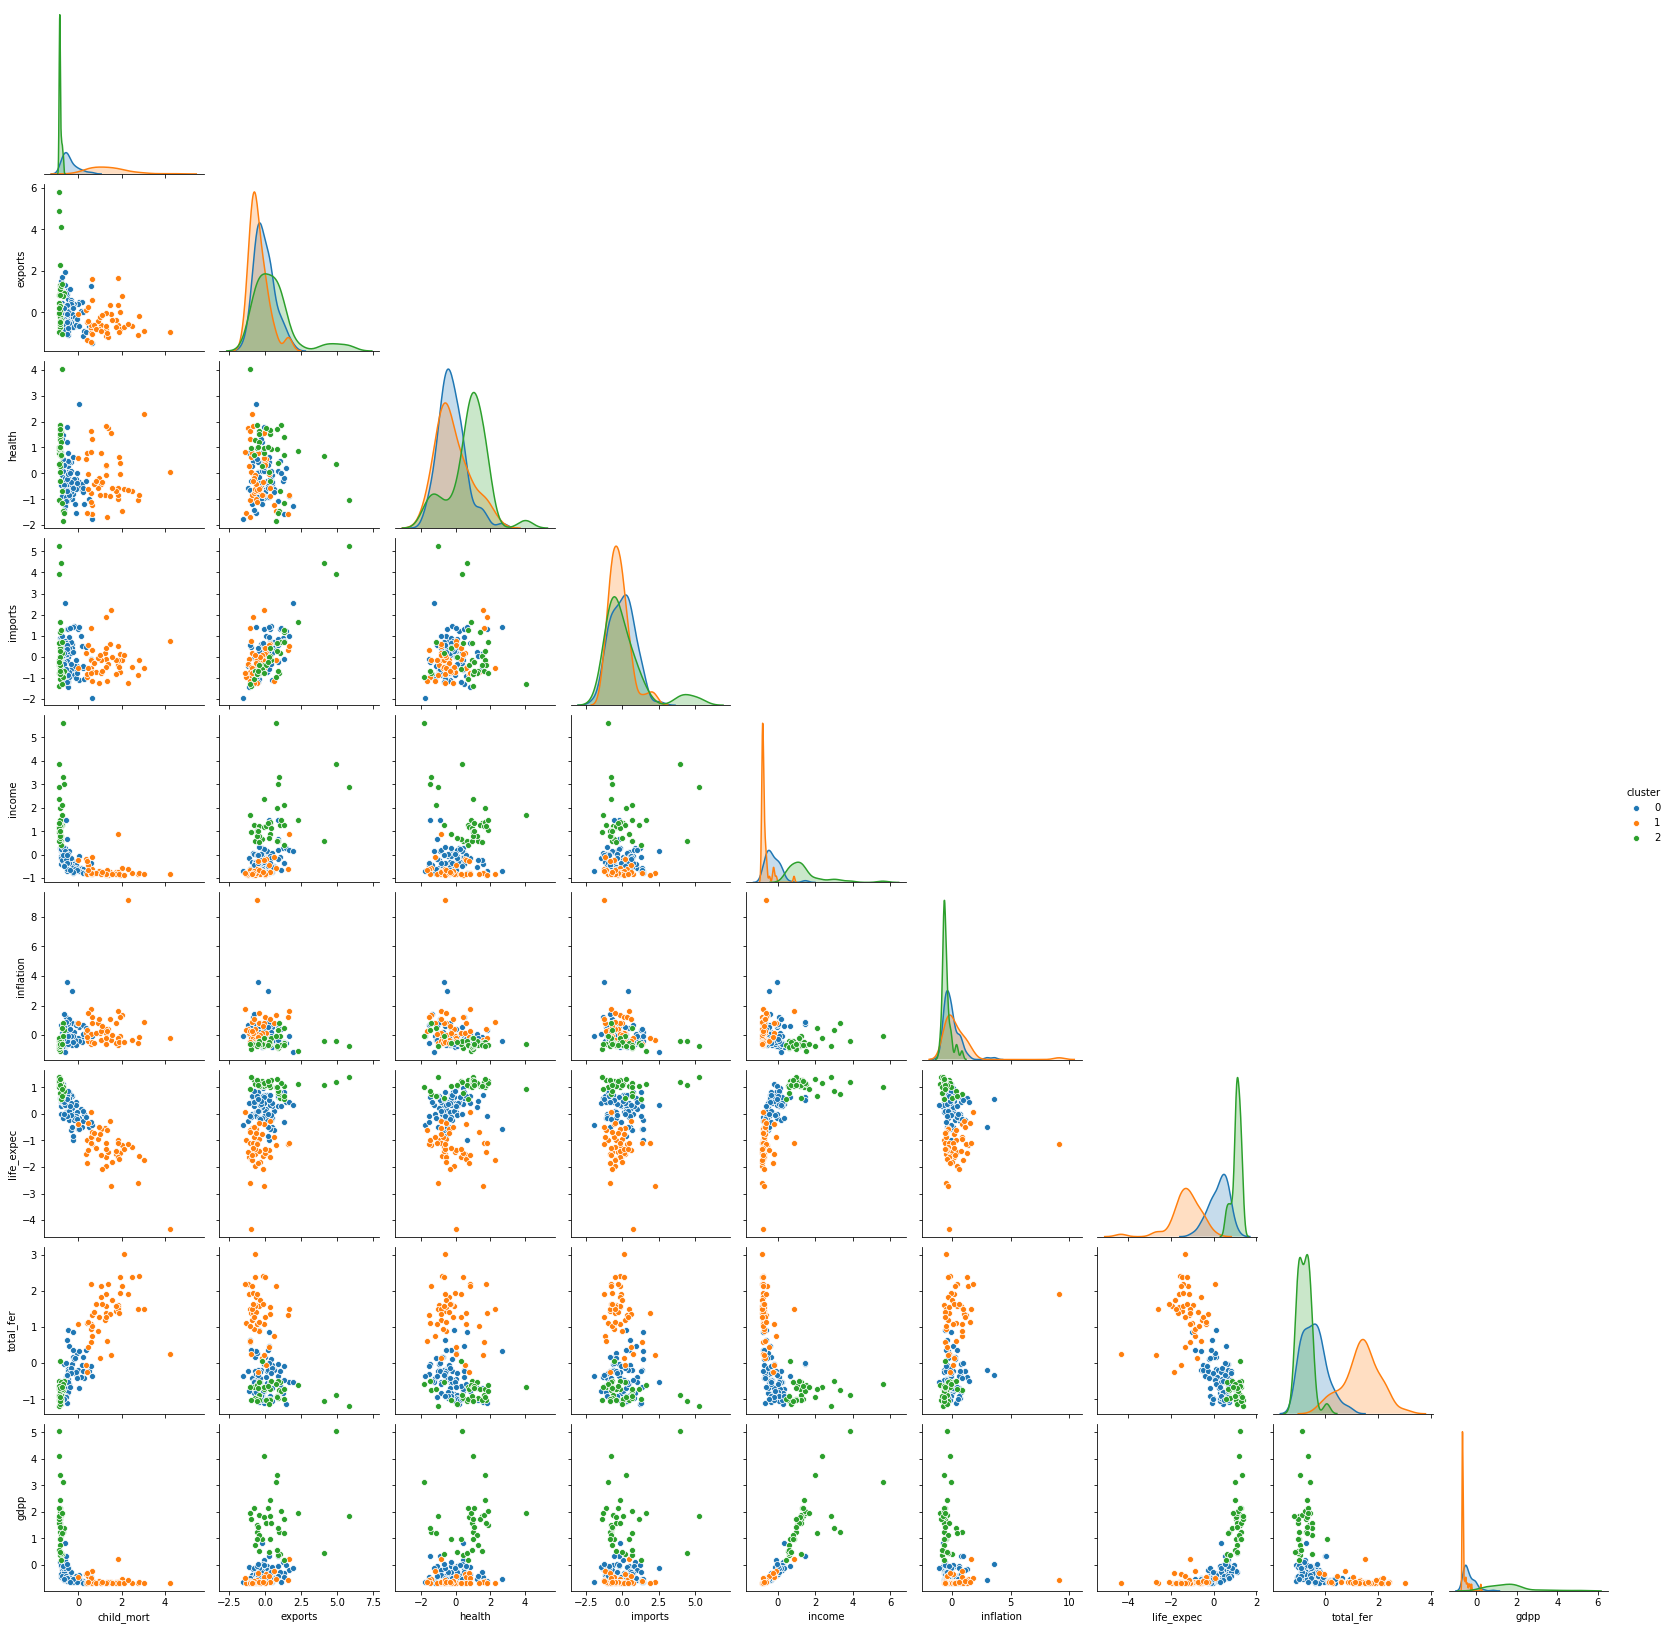

In [98]:
# for the visulation of our clusters:
sns.pairplot(country_df2, corner=True, hue='cluster')

plt.show()

In [99]:
country_df2['country'] = country['country']


In [100]:
developed=country_df2[country_df2['cluster']==2]['country']
less_developed=country_df2[country_df2['cluster']==1]['country']
developing=country_df2[country_df2['cluster']==0]['country']

print("Number of deveoped countries",len(developed))
print("Number of developing countries",len(developing))
print("Number of less-developing countries",len(less_developed))

Number of deveoped countries 36
Number of developing countries 84
Number of less-developing countries 47


In [101]:
#list(developed)
#Dev= pd.DataFrame(developed)
#Vickie = country_df2.pivot_table(index ='cluster', aggfunc =np.max)


In [102]:
#sns.scatterplot(Vickie['country'],Vickie['gdpp'], hue='cluster', data=country_df2) 
#plt.title("country vs gdpp", fontsize=15)
#plt.xlabel("country", fontsize=12)
#plt.ylabel("gdpp", fontsize=12)
#plt.show()

In [103]:
country_df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,country
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1,Afghanistan
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0,Albania
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0,Algeria
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1,Angola
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0,Antigua and Barbuda


### Choosing the optimum K

In [121]:
country_df3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,2
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1


[1, 2, 3, 4, 5, 6, 7, 8]
[1563.706586826348, 1089.5111128700332, 849.0822669910426, 717.4501267900657, 644.9198850627458, 571.2502541233023, 523.5707210468844, 466.1318723070027]


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

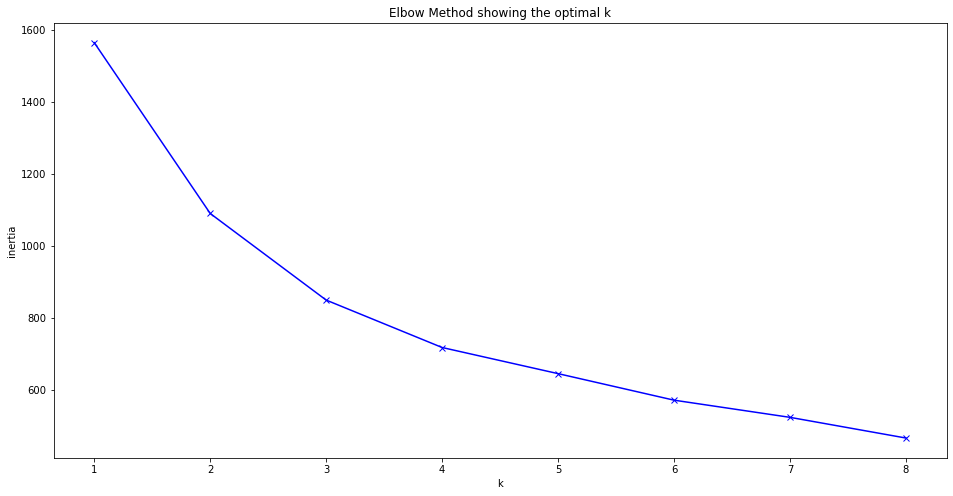

In [122]:
K = range(1, 9)
print(list(K)) # This will print a list of 1-8
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(country_df3)
    inertia.append(kmeans.inertia_)
    
print(inertia) # This shows the average squared distance from each point to its centroids

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-') # plotting K against the number of inertia
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

the spike is on 3

#### Silhouette Score

In [124]:
# to calculate the silhouette score:

from sklearn.metrics import silhouette_score

no_K=range(2, 9)
silhouette=[]

for k in no_K:
    km=KMeans(n_clusters=k, random_state=100)
    km.fit(country_df3)
    silhouette.append(silhouette_score(country_df3, km.predict(country_df3)))
print(silhouette)


[0.28491501631230143, 0.3019190843190638, 0.3142425652077401, 0.2248921080134279, 0.24359018853938455, 0.22250427254408647, 0.25593920484042854]


Text(0.5, 1.0, 'Silhouette score showing the optimal k')

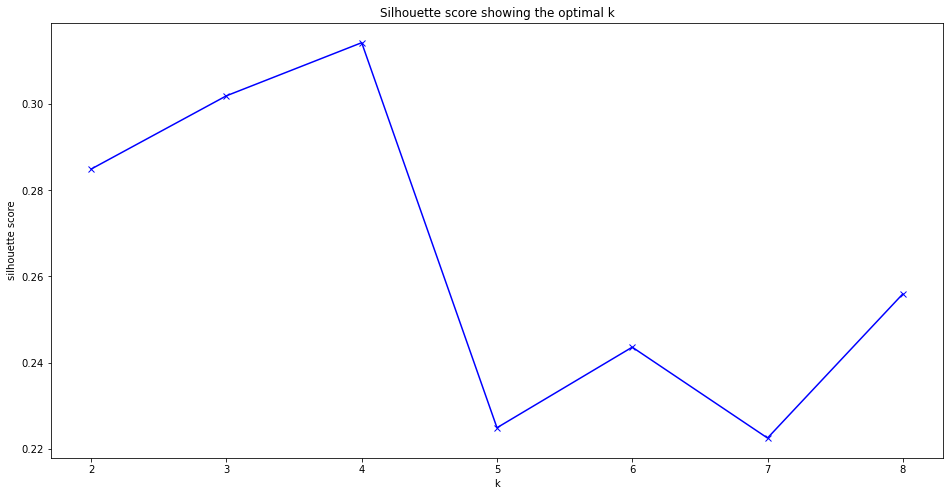

In [125]:
plt.figure(figsize=(16,8))
plt.plot(no_K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette score showing the optimal k')

The silhouette score has an upward spike at 4

## Hierarchical Clustering (Agglomerative)


In [109]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3)

# fit model and predict clusters
model1= model.fit_predict(country_df3) 

country_df3['cluster']=model1
country_df3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,2
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1


In [110]:
country_df3['cluster'].value_counts()

1    106
0     34
2     27
Name: cluster, dtype: int64

In [111]:
from scipy.cluster.hierarchy import dendrogram, linkage # Linkage is showing the way the cluster are linked  


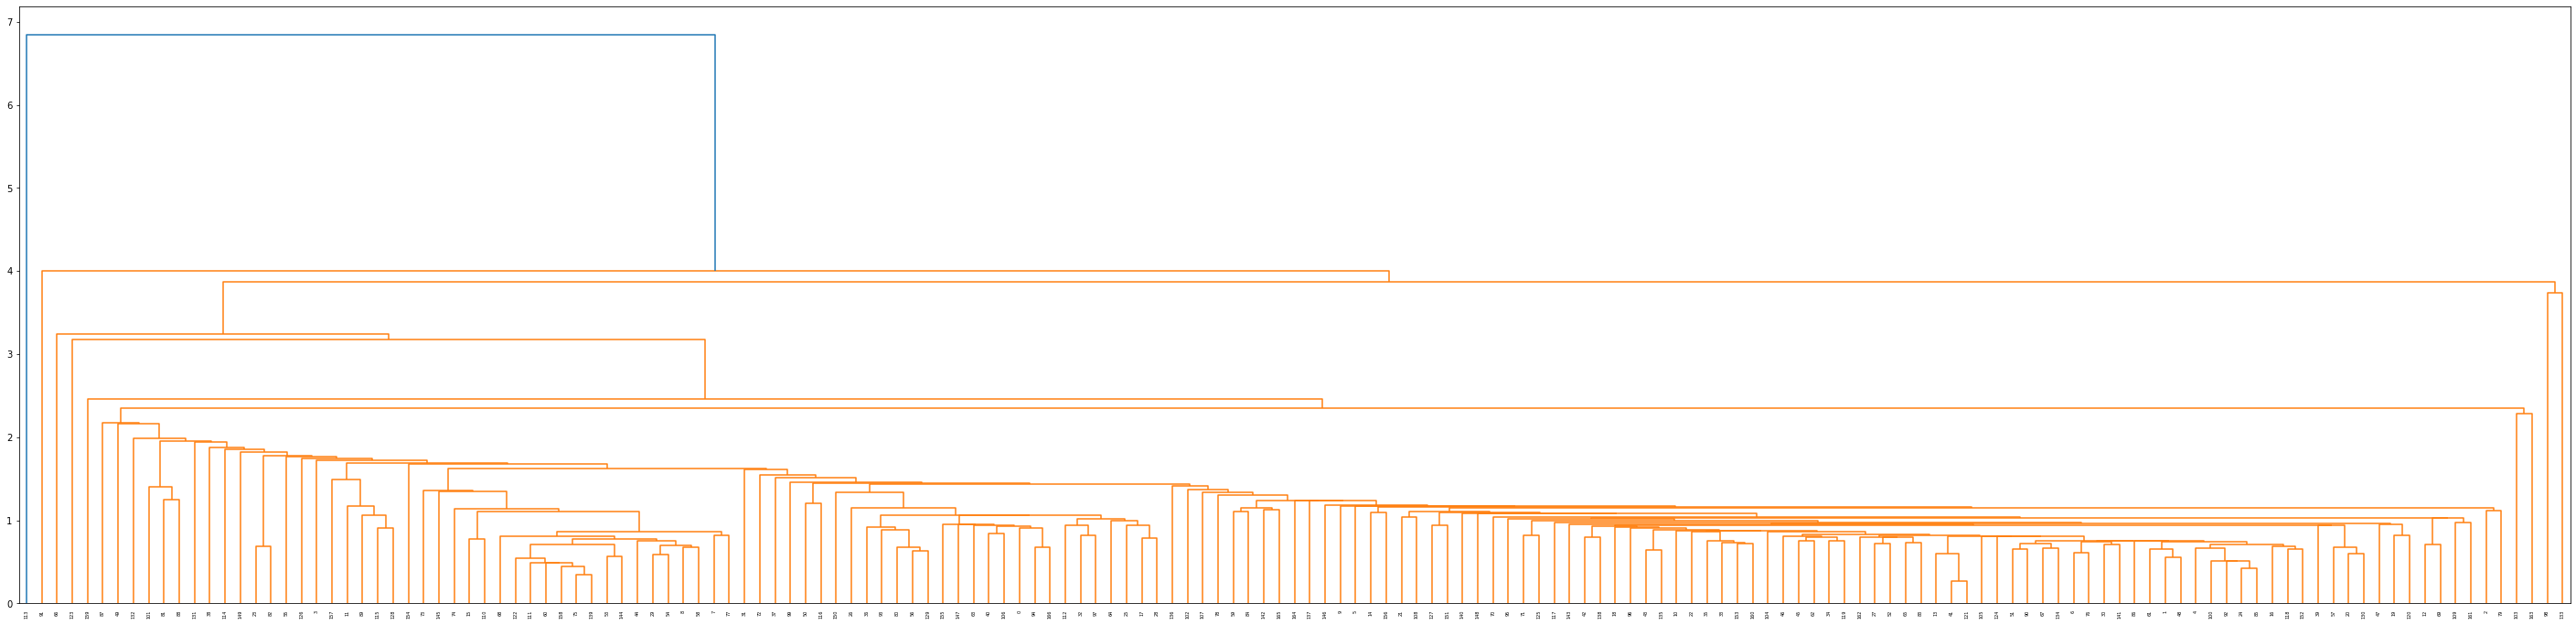

In [112]:
# Plotting the dendogram

data = linkage(country_df3)
plt.figure(figsize=(50, 12))
dendrogram(data)
plt.show()

In [113]:
country_df4.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


[0.3153134331018189, 0.24563001303300647, 0.24811891847692066, 0.21933015989396873, 0.217674980548791, 0.24187376443876954, 0.23387000967791902, 0.23713495817822783]


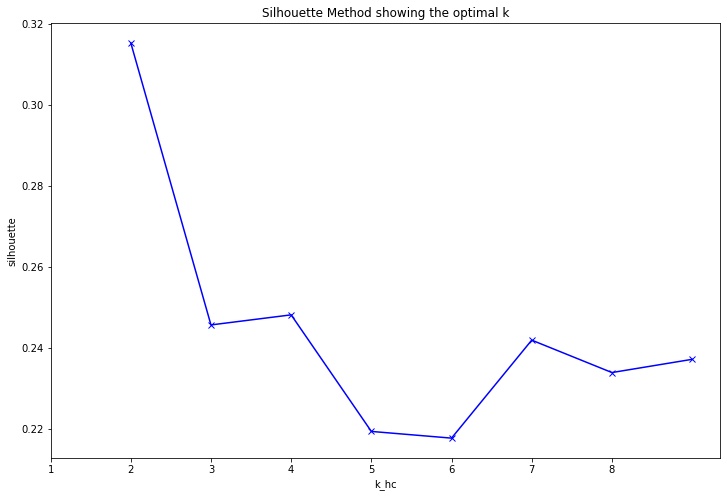

In [114]:
# Inertia

k_hc = range(2, 10)
#print(list(K)) # This will print a list of 1-8
silhouette = []

for k in k_hc:
    model = AgglomerativeClustering(n_clusters=k)

    model.fit(country_df4) 

    
    silhouette.append(silhouette_score(country_df4, model.fit_predict(country_df4)))
    
print(silhouette) # This shows the average squared distance from each point to its centroids


plt.figure(figsize=(12,8))
plt.plot(k_hc, silhouette, 'bx-') # plotting K against the number of inertia
plt.xlabel('k_hc')
plt.ylabel('silhouette')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')
plt.show()

calculate how good our model is
using silhouette Coefficient for K=3

In [115]:
silhouette_score(country_df3, model1)
# the silhouette score droped as compared to KMeans clustering

0.27384020022003713

In [116]:
country_df3.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,2
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1


### PCA

In [117]:
from sklearn.decomposition import PCA

In [118]:
pca = PCA(n_components=7)
pca.fit(country_df4)
components = pca.transform(country_df4)
pd.DataFrame(components)

,0,1,2,3,4,5,6
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978
...,...,...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748,0.009059,-0.098738
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581,0.097274,0.206735
164,0.498524,1.390744,-0.238526,-1.074098,1.176081,0.051607,-0.143627
165,-1.887451,-0.109453,1.109752,0.056257,0.618365,-0.540917,0.060256


In [119]:
print(pca.explained_variance_ratio_)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043 ]


Variance ratio of the  newly generated components are depicted . It shows that the 1st component explains 46% of the variance in the data, the 2nd variable explain 17%, etc. All together we take 5 components as these 5 will explain 94% of variance in the data.  